# CAPSTONE: Chicago Crime Stats Model Optimization

**Author: Darius Smith**

**BrainStation | Data Science | April 11, 2023**

## Table of Contents

[Features and Target](#Features-and-Target)

[Exploratory Data Analysis Summary](#Exploratory-Data-Analysis-Summary)

[Preprocessing the Data](#Preprocessing-the-Data)

[Fitting Using Machine Learning Classifiers: Logistic Regression](#Fitting-Using-Machine-Learning-Classifiers:-Logistic-Regression)


[Decision Tree](#Decision-Tree)

[Conclusion](#Conclusion)

This notebook is the last notebook within the **"Chicago Crime Stats"** capstone project. This is notebook (3) of (3). In the **"Chicago Crime Stats Modeling Preparation"** notebook, work was done to convert non-numerical columns to numerical for modeling. From there, there was an intial exploration to the problem statement to be more predictive in nature. The question was: 

>**“Using machine learning, how may we predict how 'Arrests' change with respect to Ward, Community Area, and other associated features so that we can make communities in Chicago safer for everyone?”**

Two baseline logistic regression models were conducted. Both models had an accuracy rate of ~80%. The purpose of this notebook, will be to optimize the model using machine learning classifiers. The idea is to see which of these will result in the best predictive model for classifying whether **an 'Arrest' will be in the city of Chicago.**

The following models will be used: 

1. Logistic Regression
2. Decision Tree


For every sklearn classifier we will carry out the three required steps to fit the model to the data.

These are: 

- Instantiating the model
- Fitting the model to the training data
- Evaluate the model's performance on new (test) data.
- Using `.score()` and evaluating the models based on their accuracy metric.

In [1]:
#Importing all the necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#Splitting data
from sklearn.model_selection import train_test_split 

#The scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#The classifiers  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Time stamp for timing runtime of models
import time

I will begin by reading in, and inspecting the data.

In [2]:
#Loading in data
clean_df = pd.read_csv('crime_clean_data.csv')

#Inspect the data
clean_df.head()

,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day,Week,Day of Week,Hour
0,0,0,132,1,3,33,1177560.0,1889548.0,2019,41.852248,-87.623786,9,24,39,1,8
1,0,0,1221,12,26,24,1160005.0,1905256.0,2019,41.895732,-87.687784,10,13,41,6,20
2,0,0,1224,12,27,28,1166986.0,1900306.0,2019,41.882002,-87.662287,10,5,40,5,18
3,0,0,1922,19,47,6,1164930.0,1923972.0,2019,41.946987,-87.669164,10,13,41,6,19
4,0,0,2033,20,47,3,1167380.0,1934505.0,2019,41.975838,-87.659854,10,13,41,6,14


In [3]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054833 entries, 0 to 1054832
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Arrest          1054833 non-null  int64  
 1   Domestic        1054833 non-null  int64  
 2   Beat            1054833 non-null  int64  
 3   District        1054833 non-null  int64  
 4   Ward            1054833 non-null  int64  
 5   Community Area  1054833 non-null  int64  
 6   X Coordinate    1054833 non-null  float64
 7   Y Coordinate    1054833 non-null  float64
 8   Year            1054833 non-null  int64  
 9   Latitude        1054833 non-null  float64
 10  Longitude       1054833 non-null  float64
 11  Month           1054833 non-null  int64  
 12  Day             1054833 non-null  int64  
 13  Week            1054833 non-null  int64  
 14  Day of Week     1054833 non-null  int64  
 15  Hour            1054833 non-null  int64  
dtypes: float64(4), int64(12)
memory usag

**X coordinate and Y Coordinate have the same values as Latitude and Longitude. I will drop these before proceeding with model optimization.** 

In [4]:
clean_df.drop(columns=['Latitude', 'Longitude'], axis=1, inplace=True)

## Features & Target

Listed below are the features as well as the target for modeling. 

**Features:**

- *Domestic*: Describes if an crime incident was Domestic or not. 
- *Beat*: The smallest geographic area - each beat has a dedicated police beat car     
- *District*: Indicates the police district where the incident occured.   
- *Ward*: The ward (City Council district) where the incident occured.   
- *Community Area*: Indicates the community area where the incident occured. 
- *Year*: Year the incident occured.
- *Latitude*: The latitude of the location where the incident occured.
- *Longitude*: The longitude of the location where the incident occured.
- *Month*: Month incident occured.(1-12)(January-December)
- *Day*: Day incident occured. (1-30 or 1-31 depending on the month).
- *Week*: Week incident occured. (1-52)
- *Day of Week*: Day of the week incident occured. (0 - 6)(Monday - Sunday)
- *Hour*: Hour incident occured. (0 - 23; military time)


**Target:**

- *Arrest*: Describes if an arrest was made based on incident. (1 or 0).

## Exploratory Data Analysis Summary

Generating an EDA summary. It is always best practice to make sure the data has been cleaned.

In [5]:
#Generating an EDA summary
print(f"Rows: {clean_df.shape[0]}")
print(f"Columns: {clean_df.shape[1]}")
print(f"Missing values: {clean_df.isna().sum().sum()}")
print(f"Duplicated rows: {clean_df.duplicated().sum()}")

Rows: 1054833
Columns: 14
Missing values: 0
Duplicated rows: 11491


There are 11,491 duplicated rows. I will drop these before proceeding with modeling. 

In [6]:
#Removing duplicates from the rows.
clean_df.drop_duplicates(inplace=True)

In [7]:
#Re-generating an EDA summary
print(f"Rows: {clean_df.shape[0]}")
print(f"Columns: {clean_df.shape[1]}")
print(f"Missing values: {clean_df.isna().sum().sum()}")
print(f"Duplicated rows: {clean_df.duplicated().sum()}")

Rows: 1043342
Columns: 14
Missing values: 0
Duplicated rows: 0


Duplicated rows have been taken care, now moving forward with fitting scaled data using (2) different scalers to the (3) model types listed in the beginning of the notebook. 

## Preprocessing the Data

In [8]:
#Assigning features to X 
X = clean_df.drop(['Arrest'], axis=1)

#Assigning target to y 
y = clean_df['Arrest']

#Checking the results 
display(X)
print(y)

,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Month,Day,Week,Day of Week,Hour
0,0,132,1,3,33,1177560.0,1889548.0,2019,9,24,39,1,8
1,0,1221,12,26,24,1160005.0,1905256.0,2019,10,13,41,6,20
2,0,1224,12,27,28,1166986.0,1900306.0,2019,10,5,40,5,18
3,0,1922,19,47,6,1164930.0,1923972.0,2019,10,13,41,6,19
4,0,2033,20,47,3,1167380.0,1934505.0,2019,10,13,41,6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054828,1,2525,25,35,22,1149786.0,1909259.0,2017,10,21,42,5,11
1054829,1,2515,25,36,19,1141037.0,1913776.0,2019,6,2,22,6,9
1054830,0,922,9,15,58,1158774.0,1875140.0,2017,9,5,36,1,9
1054831,1,2012,24,40,77,1164423.0,1943606.0,2017,1,1,52,6,0


0          0
1          0
2          0
3          0
4          0
          ..
1054828    1
1054829    0
1054830    0
1054831    0
1054832    0
Name: Arrest, Length: 1043342, dtype: int64


In [9]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)

#Checking the results 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(730339, 13) (313003, 13) (730339,) (313003,)


Now that we have the `X_train` and `X_test`, I will transform the transform them with (**2**) different scalers. 

### MinMax Scaler

In [10]:
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler and transform both data subsets
# we can fit and transform 'X_train' in the same step
X_train_mm = MM.fit_transform(X_train)
X_test_mm = MM.transform(X_test)

### Standard Scaler

In [11]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

## Fitting Using Machine Learning Classifiers: Logistic Regression

I will start with the `LogisticRegression()` by using solver = `lbfgs` first, using a confusion matrix for interpretability, precison and recall, and then a classification report for interpretability. I will then try out different C values. This will also include using the Ridge Regression ( `penalty="l2"` ).

**The smaller the `C`, the greater the penalization** (where the penalty is used to reduce overfitting of the model to the training data). Trying out different C values and checking the model's accuracy scores, allows us to find the best spot for our model. 

In [12]:
from sklearn.linear_model import LogisticRegression

#Instantiating the model model
arrest_logit = LogisticRegression(solver='lbfgs', random_state=42, max_iter=10000)

#Fitting the model
arrest_logit.fit(X_train, y_train);

In [13]:
print(f'Score on train: {arrest_logit.score(X_train, y_train)}')
print(f'Score on test: {arrest_logit.score(X_test, y_test)}')

Score on train: 0.796771088494521
Score on test: 0.7967719159241285


I got roughly ~80% accuracy on both the train and test set. This is similar to what I got on baseline models. The next step will be to produce a confusion matrix. This will allow me to dive deeper into my results. In binary classification, there are four possible outcomes to making a prediction:

1. **True Positive (TP)**: Correctly predict that $x$ belongs to class 1/positive class
2. **False Positive (FP)**: Incorrectly predict that $x$  belongs to class 1/positive class
3. **True Negative (TN)**: Correctly predict $x$'s membership in class 0/negative class 
4. **False Negative (FN)**: Incorrectly predict $x$'s membership in class 0/negative class

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = arrest_logit.predict(X_test)

# Generate confusion matrix
ar_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
ar_df = pd.DataFrame(
    ar_matrix, 
    columns=["Predicted Non-Arrest", "Predicted Arrest"],
    index=["True Non-Arrest", "True Arrest"]
)

display(ar_df)

,Predicted Non-Arrest,Predicted Arrest
True Non-Arrest,249392,0
True Arrest,63611,0


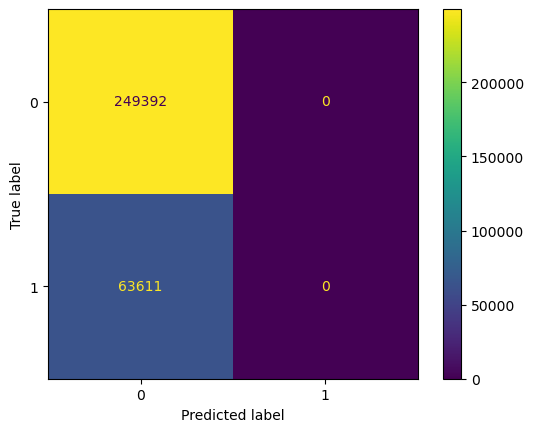

In [16]:
#The function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(arrest_logit, X_test, y_test);

Now, I will interpret these results and what they mean. 

In [17]:
#Select the FP from the confusion matrix
#True label 0 & predicted label 1
fp = ar_matrix[0, 1]

print(f"{fp} legitimate arrests were misclassified as non-arrests.")

0 legitimate arrests were misclassified as non-arrests.


In [39]:
#Select the TP from the confusion matrix
#True label 1 & predicted label 1
tp = ar_matrix[1, 1]

# total number of true label 1
num_frauds = ar_matrix[1, :].sum()

print(f"{tp} non-arrests arrests were predicted correctly by the model out of {num_frauds} frauds.")

0 non-arrests arrests were predicted correctly by the model out of 63611 frauds.


## Precision and Recall

Because of the fact that accuracy alone can be misleading depending on the class balance of the data, alternative metrics consider the relative proportions of correct and incorrect classifications in both the positive and negative classes. I will be using a precision and recall to choose the correct metric for our model which can actually increase its predictive power and give a great competitive advantage.

In [20]:
#Recalling the confusion matrix
display(ar_df)

,Predicted Non-Arrest,Predicted Arrest
True Non-Arrest,249392,0
True Arrest,63611,0


I can calculate our precision and recall using the following formula:

In [22]:
tp = ar_matrix[1, 1]
predicted_arrest = ar_matrix[:, 1].sum()

precision = tp/predicted_arrest

print(f"Precision = {tp}/{predicted_arrest} = {round(precision*100, 2)}%")

Precision = 0/0 = nan%


/var/folders/26/3jnnrvjs3534y_dh9pff888c0000gn/T/ipykernel_55481/481331226.py:4: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/predicted_arrest


In [23]:
tp = ar_matrix[1, 1]
true_arrest = ar_matrix[1, :].sum()

recall = tp/true_arrest

print(f"Recall = {tp}/{true_arrest} = {round(recall*100, 2)}%")

Recall = 0/63611 = 0.0%


**What does this mean?** 

Both the precision and the recall came back with 0. This means that classifier being used cannot predict any correct positive result.

In [24]:
#Precision 
from sklearn.metrics import precision_score

#precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

/Users/ds/opt/anaconda3/envs/Brainstation/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [25]:
#Recall
from sklearn.metrics import recall_score

#recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.0

I will now calculate the F1 score of the data.

The F1 score is the harmonic mean of the precision and recall scores.

The F1 score is always between the precision and recall score.
An F1 score reaches its best value at 1 which corresponds to both perfect precision and perfect recall.
The worst F1 score is 0 which occurs if either precision or recall becomes zero; this is one advantage of using the harmonic mean over a simple average of precision and recall.
We use the F1 score in order to try and maximize the precision and recall scores simultaneously

I will now calculate the score. 

In [26]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.0

The f1 score came back representing a model that is unable to classify any observation into the correct class. I will reproduce the precision, recall, and f1 using a classification report. 

In [27]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89    249392
           1       0.00      0.00      0.00     63611

    accuracy                           0.80    313003
   macro avg       0.40      0.50      0.44    313003
weighted avg       0.63      0.80      0.71    313003



/Users/ds/opt/anaconda3/envs/Brainstation/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ds/opt/anaconda3/envs/Brainstation/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ds/opt/anaconda3/envs/Brainstation/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Based on the above, we are not able to accurately predict an arrest given the features that are being using. I will next use C-Values from a logistic regression and a decision tree to try and optimize the model.

### Logistic Regression - Fitting to Normalized and Standardized Data

Fitting to normalized data. 

In [29]:
start = time.time()

# The C_values to try, smaller value of C specifies stronger regularization
C_values = [ 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]

# Empty lists to append train and test accuracy scores to 
train_acc_mm = list()
test_acc_mm = list()

# Loop through the different C values
for C in C_values:

    # Instantiate the model
    logit = LogisticRegression(C=C, max_iter=1000, penalty="l2", random_state=42)

    # Fit the model 
    logit.fit(X_train_mm, y_train)

    # Score the model 
    train_acc_mm.append(logit.score(X_train_mm, y_train))
    test_acc_mm.append(logit.score(X_test_mm, y_test))

stop = time.time()
runtime_logit_mm = stop-start
print(f"Runtime: {round(runtime_logit_mm,2)} seconds")

Runtime: 18.6 seconds


In [30]:
print(train_acc_mm)

[0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521]


In [31]:
print(test_acc_mm)

[0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285]


Observation - The arrays for the train and the test are all the same. 

Visualizing the accuracy scores for the different C values.

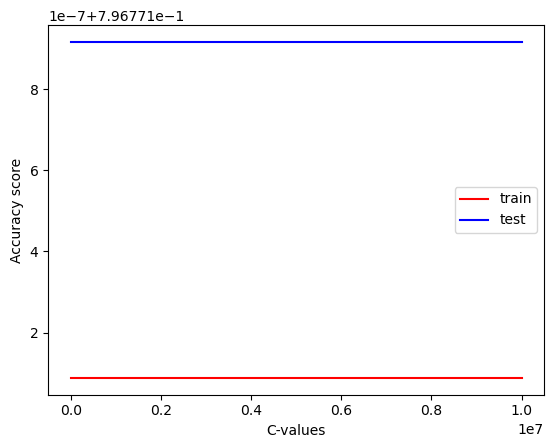

In [32]:
# visualize accuracies for different C-values
plt.figure()
plt.plot(C_values, train_acc_mm, c='red', label='train')
plt.plot(C_values, test_acc_mm, c='blue', label='test')
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

In [33]:
# Instantiate the model 
logit_mm = LogisticRegression(C=1, random_state=42)

# Fit the model 
logit_mm.fit(X_train_mm, y_train)

# Store accuracy scores
logit_mm_train = logit_mm.score(X_train_mm, y_train)
logit_mm_test = logit_mm.score(X_test_mm, y_test)


# Score the model 
print(f"Train Accuracy: {logit_mm_train}")
print(f"Test Accuracy: {logit_mm_test}")

Train Accuracy: 0.796771088494521
Test Accuracy: 0.7967719159241285


Fitting to standardized data. 

In [34]:
start = time.time()

# Empty lists to append the training and test accuracy scores to  
train_acc_ss = []
test_acc_ss = []

# Loop through the same C values 
for C in C_values:

    # Instantiate the model 
    logit=LogisticRegression(C=C, max_iter=1000, penalty="l2", random_state=42)

    # Fit the model 
    logit.fit(X_train_ss, y_train)

    # Score the model 
    train_acc_ss.append(logit.score(X_train_ss, y_train))
    test_acc_ss.append(logit.score(X_test_ss, y_test))
    
stop = time.time()
runtime_logit_ss = stop-start
print(f"Runtime: {round(runtime_logit_ss,2)} seconds")

Runtime: 5.3 seconds


In [35]:
print(train_acc_ss)

[0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521, 0.796771088494521]


In [36]:
print(test_acc_ss)

[0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285, 0.7967719159241285]


Observation - The arrays for the train and the test are all the same.

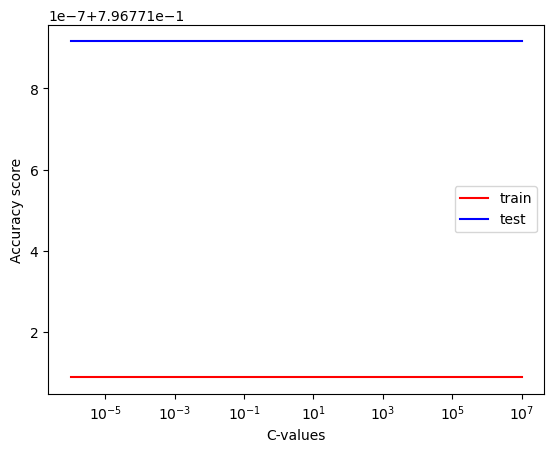

In [37]:
# Plotting the train and test scores for every C value 
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='train')
plt.plot(C_values, test_acc_ss, c='blue', label='test')
plt.xscale('log')
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

In [38]:
#Instantiate the model
logit_ss = LogisticRegression(C=1, random_state=42)

# Fit the model 
logit_ss.fit(X_train_ss, y_train)

# Store accuracy scores
logit_ss_train = logit_ss.score(X_train_ss, y_train)
logit_ss_test = logit_ss.score(X_test_ss, y_test)

# Score the model 
print(f"Train Accuracy: {logit_ss_train}")
print(f"Test Accuracy: {logit_ss_test}")

Train Accuracy: 0.796771088494521
Test Accuracy: 0.7967719159241285


**The minmax scaler and the standardized scaler produced the same train and test accuracy. Another observation is that when plotting the C-Values the graphs were mysterious in nature. I am beginning to believe that this is the best that we can do with using a logistic regression.**

## Decision Tree

I will now fit a `DecisionTreeClassifier()` with different `max_depth` values for both sets of transformed data. 

The parameter `max_depth` is what the name suggests: the maximum depth that you allow the tree to grow to. Without this, a decision tree classifier will continue until it has split every data point i.e. overfitting; the model will predict the training values but it will not perform well with unseen data.

Fitting Decision Tree model to normalized data

In [40]:
#Number of rows
X_train.shape[0]

730339

In [41]:
#Indicating range of max_depth values
range(1, int(np.sqrt(X_train.shape[0])))

range(1, 854)

Taking the square root of the number of rows in a sample is a reasonable starting point to inform the highest max_depth value to be tested.

In [42]:
start = time.time()

#A list of the maximum depths to try out and save to 'depths'
depths = range(1, int(np.sqrt(X_train.shape[0])))

#Empty lists to append to
train_acc_mm = list()
test_acc_mm = list()

#Loop through the depths
for max_depth in depths:
    
    #Instantiate the model 
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    #Fit the model 
    dt.fit(X_train_mm, y_train)
    
    #Score the model 
    train_acc_mm.append(dt.score(X_train_mm, y_train))
    test_acc_mm.append(dt.score(X_test_mm, y_test))
    
stop = time.time()
runtime_dt_mm = stop-start
print(f"Runtime: {round(runtime_dt_mm,2)} seconds")

Runtime: 4619.11 seconds


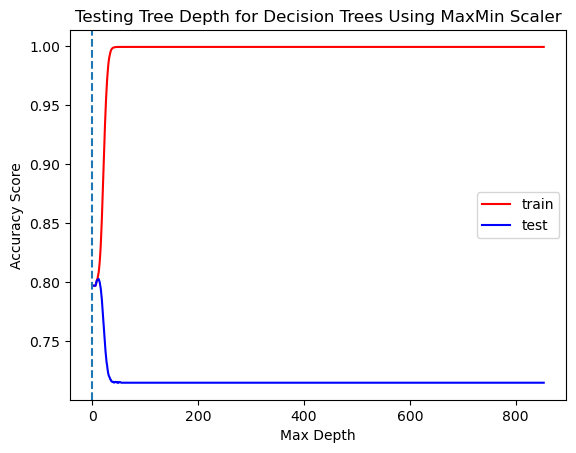

In [43]:
#Plotting the accuracies
plt.figure()
plt.plot(depths, train_acc_mm, c='r', label='train')
plt.plot(depths, test_acc_mm, c='b', label='test')
plt.axvline(linestyle='--')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Testing Tree Depth for Decision Trees Using MaxMin Scaler')
plt.legend()
plt.show()

In [44]:
# Best Decision Tree Classifier on normalized data
# Instantiate the model 
dt_mm = DecisionTreeClassifier(max_depth=5)
    
# Fit the model 
dt_mm.fit(X_train_mm, y_train)

# Store accuracy scores
dt_mm_train = dt_mm.score(X_train_mm, y_train)
dt_mm_test = dt_mm.score(X_test_mm, y_test)

print(f"Train Accuracy: {dt_mm_train}")
print(f"Test Accuracy: {dt_mm_test}")

Train Accuracy: 0.796771088494521
Test Accuracy: 0.7967719159241285


Fitting Decision Tree model to standardized data

In [45]:
start = time.time()

#Empty lists to append to 
train_acc_ss = []
test_acc_ss = []

#Loop through the different depths
for max_depth in depths: 
    
    #Instantiate the model 
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    #Fit the model 
    dt.fit(X_train_ss, y_train)
    
    #Score the model 
    train_acc_ss.append(dt.score(X_train_ss, y_train))
    test_acc_ss.append(dt.score(X_test_ss, y_test))
    
stop = time.time()
runtime_dt_ss = stop-start
print(f"Runtime: {round(runtime_dt_ss,2)} seconds")

Runtime: 4612.28 seconds


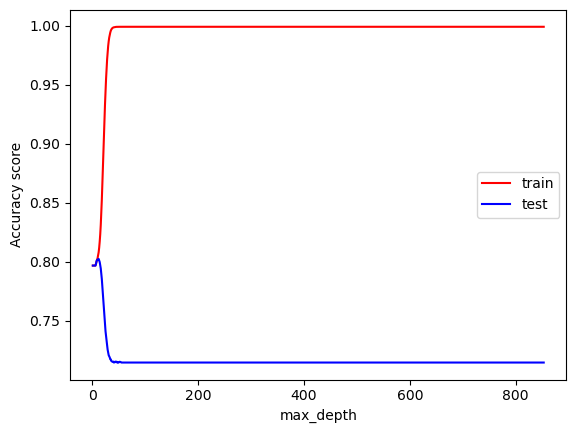

In [46]:
#Plotting the accuracies
plt.figure()
plt.plot(depths, train_acc_ss, c='red', label='train')
plt.plot(depths, test_acc_ss, c='blue', label='test')
plt.xlabel("max_depth")
plt.ylabel("Accuracy score")
plt.legend()
plt.show()

In [47]:
#Best Decision Tree Classifier on standardized data
#Instantiate the model 
dt_ss = DecisionTreeClassifier(max_depth=4)
    
#Fit the model 
dt_ss.fit(X_train_ss, y_train)

#Store accuracy scores
dt_ss_train = dt_ss.score(X_train_ss, y_train)
dt_ss_test = dt_ss.score(X_test_ss, y_test)

#Score the model 
print(f"Train Accuracy: {dt_ss_train}")
print(f"Test Accuracy: {dt_ss_test}")

Train Accuracy: 0.796771088494521
Test Accuracy: 0.7967719159241285


## Observations

- Intuitively, the max_depth is around 4/5. We see that after this point, the model begins to overfit to the training data.
- The `DecisionTreeClassifier()` performance on both the normalized and standardized data for the given 'max_depth' is identical. This is because every split or decision is made based on a single attribute at a time. 
- Decision Tree Classifiers are insensitive to different scales! I did not have to scale data for this model. 
- The `DecisionTreeClassifier()` performcance is the same as the `Logistic Regression`. This was not expected and a more in depth analysis will need to be checked. 

## Drawing the Results Together

In [51]:
train_mm_scores = [logit_mm_train, dt_mm_train]
test_mm_scores = [logit_mm_test, dt_mm_test]
runtimes_mm = [runtime_logit_mm, runtime_dt_mm]
train_ss_scores = [logit_ss_train, dt_ss_train]
test_ss_scores = [logit_ss_test, dt_ss_test]
runtimes_ss = [runtime_logit_ss, runtime_dt_ss]

rows = ['Logistic Regression', 'Decision Tree Classifier']

model_summary = pd.DataFrame(list(zip(train_mm_scores, test_mm_scores, runtimes_mm, train_ss_scores, test_ss_scores, runtimes_ss)),
                             index=rows,
                             columns=pd.MultiIndex.from_product([['MinMaxScaler()','StandardScaler()'],
                                                                 ['Train data', 'Test data', 'Runtime(sec)']]))

model_summary

MinMaxScaler()                         \
                             Train data Test data Runtime(sec)   
Logistic Regression            0.796771  0.796772    18.602544   
Decision Tree Classifier       0.796771  0.796772  4619.108526   

                         StandardScaler()                         
                               Train data Test data Runtime(sec)  
Logistic Regression              0.796771  0.796772     5.299975  
Decision Tree Classifier         0.796771  0.796772  4612.275964

## Conclusion



This notebook is the last notebook within the "Chicago Crime Stats" capstone project. This is notebook (3) of (3). The 
problem statement that was explored was: 

>**“Using machine learning, how may we predict how 'Arrests' change with respect to Ward, Community Area, and other associated features so that we can make communities in Chicago safer for everyone?”**

Our baseline models showed an accuracy of ~80%. After this, more measures were taken for model optimization. These included using a `Logistic Regression` but this time using `Precision and Recall` and a `Classification Report` to understand an interpret the findings. A `Decision Tree` was also used. 

After several attempts, it was observed that the train and test accuracies for all models were the same. In additon, it is safe to say that we cannot predict an `Arrest` with certainty. 